<a href="https://colab.research.google.com/github/simulate111/mini-project-2-Abo/blob/main/MIniProject2Reza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Conv1D, SimpleRNN
from zipfile import ZipFile
import urllib.request
import os
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
file_path = 'https://raw.githubusercontent.com/simulate111/mini-project-2-Abo/main/Sentiment140.tenPercent.sample.tweets.tsv'
df = pd.read_csv(file_path, sep='\t', header=0)
display(df.head())
df.info()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   sentiment_label  160000 non-null  int64 
 1   tweet_text       160000 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [3]:
sentiment_label_counts = df['sentiment_label'].value_counts()
print(sentiment_label_counts)

4    80000
0    80000
Name: sentiment_label, dtype: int64


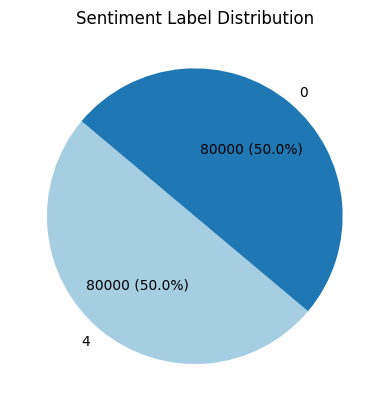

In [4]:
sentiment_label_counts = df['sentiment_label'].value_counts()
plt.pie(sentiment_label_counts, labels=sentiment_label_counts.index, autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sentiment_label_counts.sum() / 100, p),
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Sentiment Label Distribution')
plt.show()

In [5]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
sentiment_label    0
tweet_text         0
dtype: int64


In [6]:
df['text_length'] = df['tweet_text'].apply(len)
print("Text Length Summary:")
print(df['text_length'].describe())

Text Length Summary:
count    160000.000000
mean         74.113481
std          36.440383
min           6.000000
25%          44.000000
50%          69.000000
75%         104.000000
max         186.000000
Name: text_length, dtype: float64


In [7]:
df['sentiment_label'] = df['sentiment_label'].replace({4: 1})
display(df.head())

,sentiment_label,tweet_text,text_length
0,1,"@elephantbird Hey dear, Happy Friday to You A...",85
1,1,Ughhh layin downnnn Waiting for zeina to co...,58
2,0,"@greeniebach I reckon he'll play, even if he's...",116
3,0,@vaLewee I know! Saw it on the news!,37
4,0,very sad that http://www.fabchannel.com/ has c...,118


In [8]:
#Cleaning the data
def clean_tweet(tweet):
    tweet = re.sub(r'@[\w]+', '', tweet)
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^A-Za-z0-9]+', ' ', tweet)
    tweet = ' '.join(tweet.split())
    return tweet
df['cleaned_tweet'] = df['tweet_text'].apply(clean_tweet)
display(df[['tweet_text', 'cleaned_tweet']].head())

,tweet_text,cleaned_tweet
0,"@elephantbird Hey dear, Happy Friday to You A...",Hey dear Happy Friday to You Already had your ...
1,Ughhh layin downnnn Waiting for zeina to co...,Ughhh layin downnnn Waiting for zeina to cook ...
2,"@greeniebach I reckon he'll play, even if he's...",I reckon he ll play even if he s not 100 but i...
3,@vaLewee I know! Saw it on the news!,I know Saw it on the news
4,very sad that http://www.fabchannel.com/ has c...,very sad that has closed down One of the few w...


In [9]:
# Check for null or empty content
null_cleaned_tweets = df[df['cleaned_tweet'].isnull() | (df['cleaned_tweet'] == '')]
print("Summary of Null or Empty Cleaned Tweets:")
print(null_cleaned_tweets.info())
print(f"Null values: \n\n{df.isna().sum()}")

Summary of Null or Empty Cleaned Tweets:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 183 to 159158
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment_label  330 non-null    int64 
 1   tweet_text       330 non-null    object
 2   text_length      330 non-null    int64 
 3   cleaned_tweet    330 non-null    object
dtypes: int64(2), object(2)
memory usage: 12.9+ KB
None
Null values: 

sentiment_label    0
tweet_text         0
text_length        0
cleaned_tweet      0
dtype: int64


### Tokienization

In [10]:
tokenized_sequences = df['cleaned_tweet']
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_sequences)
# Convert text data to sequences of integers
sequences = tokenizer.texts_to_sequences(tokenized_sequences)
print("Sample Sequences:", sequences[:2])
print(f"Word index length: {len(tokenizer.word_index)}")
some_words = list(tokenizer.word_index.keys())[:10]
print(f"Some words: {some_words}")

Sample Sequences: [[150, 636, 120, 322, 2, 8, 206, 66, 45, 1748, 12, 2193, 10, 358], [2194, 3973, 20681, 298, 10, 29220, 2, 1155, 523]]
Word index length: 70393
Some words: ['i', 'to', 'the', 'a', 'my', 'and', 'it', 'you', 'is', 'for']


In [11]:
X = sequences
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", len(X_train))
print("X_test:", len(X_test))
print(" y_train:", len(y_train))
print("y_test:", len(y_test))

X_train: 128000
X_test: 32000
 y_train: 128000
y_test: 32000


In [12]:
max_token_length = max(len(sequence) for sequence in tokenized_sequences)
print(f"Maximum Token Length: {max_token_length}")

Maximum Token Length: 169


### NEural network

In [13]:
max_sequence_length = max(len(sequence) for sequence in X_train)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_sequence_length)
glove_url = 'https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip'
# Create a directory to store the download files
download_dir = 'glove_twitter'
os.makedirs(download_dir, exist_ok=True)
zip_file_path = os.path.join(download_dir, 'glove.twitter.27B.zip')
urllib.request.urlretrieve(glove_url, zip_file_path)
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)

glove_embeddings_path = os.path.join(download_dir, 'glove.twitter.27B.200d.txt')
# Load the pre-trained GloVe
embeddings_index = {}
with open(glove_embeddings_path, 'r', encoding='utf-8') as file:
    for line in file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [14]:
embedding_dim = len(embeddings_index.get('a'))
num_words = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [16]:
# Neural network model with GloVe embeddings
model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Flatten(), Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

Epoch 1/5
4000/4000 [==============================] - 27s 6ms/step - loss: 0.5281 - acc: 0.7419 - val_loss: 0.5157 - val_acc: 0.7515
Epoch 2/5
4000/4000 [==============================] - 21s 5ms/step - loss: 0.5033 - acc: 0.7598 - val_loss: 0.5196 - val_acc: 0.7546
Epoch 3/5
4000/4000 [==============================] - 16s 4ms/step - loss: 0.4987 - acc: 0.7635 - val_loss: 0.5223 - val_acc: 0.7521
Epoch 4/5
4000/4000 [==============================] - 19s 5ms/step - loss: 0.4965 - acc: 0.7659 - val_loss: 0.5271 - val_acc: 0.7501
Epoch 5/5
4000/4000 [==============================] - 15s 4ms/step - loss: 0.4958 - acc: 0.7669 - val_loss: 0.5254 - val_acc: 0.7527


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 46, 200)           14078800  
                                                                 
 flatten_1 (Flatten)         (None, 9200)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9201      
                                                                 
Total params: 14088001 (53.74 MB)
Trainable params: 9201 (35.94 KB)
Non-trainable params: 14078800 (53.71 MB)
_________________________________________________________________


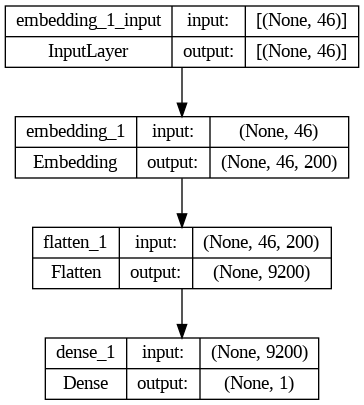

In [18]:
plot_model(model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

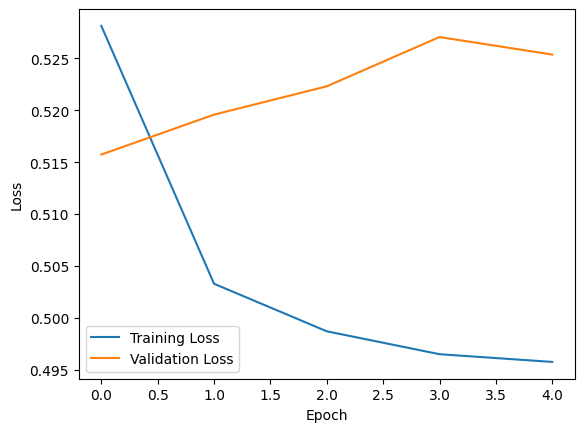

In [19]:
# Plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Convolutional Neural Network (CNN):

In [21]:
modelCNN = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Conv1D(128, 5, activation='relu'), Conv1D(128, 3, activation='relu'), Dense(64, activation='relu'), Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')])

modelCNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
historyCNN = modelCNN.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))
test_loss, test_accuracy = modelCNN.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

Epoch 1/5
4000/4000 [==============================] - 37s 8ms/step - loss: 0.6660 - acc: 0.5582 - val_loss: 0.6632 - val_acc: 0.5623
Epoch 2/5
4000/4000 [==============================] - 27s 7ms/step - loss: 0.6599 - acc: 0.5658 - val_loss: 0.6621 - val_acc: 0.5632
Epoch 3/5
4000/4000 [==============================] - 25s 6ms/step - loss: 0.6558 - acc: 0.5697 - val_loss: 0.6600 - val_acc: 0.5652
Epoch 4/5
4000/4000 [==============================] - 27s 7ms/step - loss: 0.6522 - acc: 0.5726 - val_loss: 0.6605 - val_acc: 0.5644
Epoch 5/5
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6622 - acc: 0.5643
Test Accuracy: 56.43%
Test Loss: 0.6622


In [22]:
modelCNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 46, 200)           14078800  
                                                                 
 conv1d_2 (Conv1D)           (None, 42, 128)           128128    
                                                                 
 conv1d_3 (Conv1D)           (None, 40, 128)           49280     
                                                                 
 dense_5 (Dense)             (None, 40, 64)            8256      
                                                                 
 dense_6 (Dense)             (None, 40, 128)           8320      
                                                                 
 dense_7 (Dense)             (None, 40, 1)             129       
                                                                 
Total params: 14272913 (54.45 MB)
Trainable params: 19

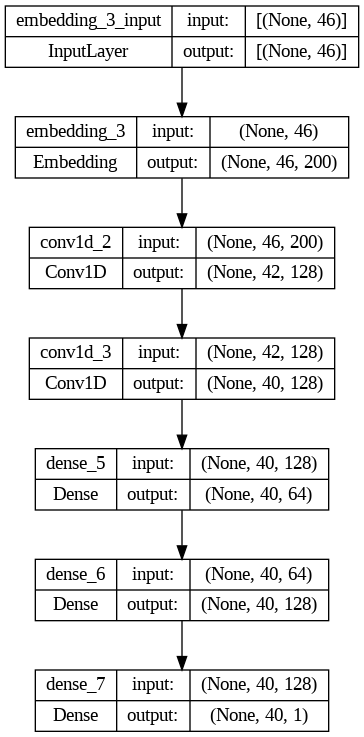

In [23]:
plot_model(modelCNN, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

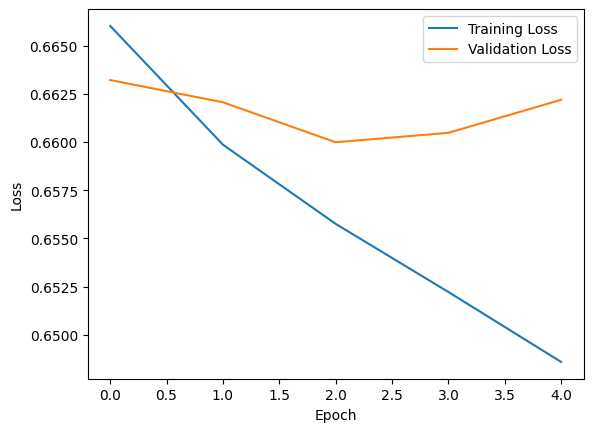

In [24]:
# Plot
plt.plot(historyCNN.history['loss'], label='Training Loss')
plt.plot(historyCNN.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

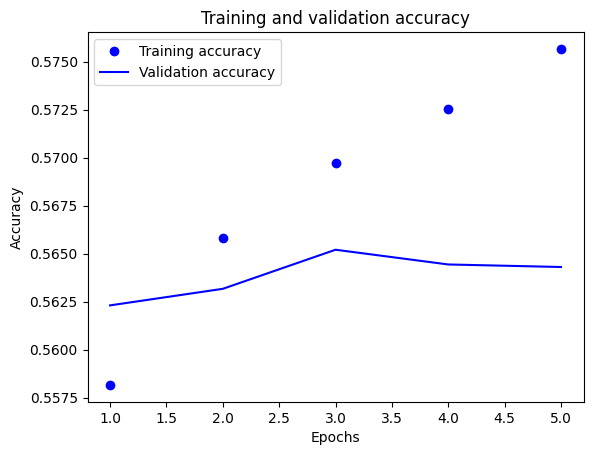

In [25]:
accuracy = historyCNN.history['acc']
val_accuracy = historyCNN.history['val_acc']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### RNN

In [26]:
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')
modelRNN = Sequential()
modelRNN.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
modelRNN.add(SimpleRNN(units=64, activation='relu', return_sequences=True))  # Return sequences to connect multiple SimpleRNN layers
modelRNN.add(SimpleRNN(units=128, activation='relu'))
modelRNN.add(Dense(units=1, activation='sigmoid'))
modelRNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [27]:
epochs = 5
historyRNN = modelRNN.fit(X_train_padded, y_train, epochs=epochs, validation_data=(X_test_padded, y_test))

Epoch 1/5
4000/4000 [==============================] - 541s 134ms/step - loss: 0.4802 - acc: 0.7709 - val_loss: 0.4460 - val_acc: 0.7942
Epoch 2/5
4000/4000 [==============================] - 491s 123ms/step - loss: 0.3658 - acc: 0.8401 - val_loss: 0.4472 - val_acc: 0.7903
Epoch 3/5
4000/4000 [==============================] - 498s 125ms/step - loss: 0.2810 - acc: 0.8811 - val_loss: 0.4995 - val_acc: 0.7909
Epoch 4/5
4000/4000 [==============================] - 484s 121ms/step - loss: 0.2196 - acc: 0.9085 - val_loss: 0.5599 - val_acc: 0.7821
Epoch 5/5
4000/4000 [==============================] - 497s 124ms/step - loss: 0.1777 - acc: 0.9273 - val_loss: 0.5899 - val_acc: 0.7729


In [28]:
test_loss, test_accuracy = modelRNN.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

1000/1000 [==============================] - 23s 23ms/step - loss: 0.5899 - acc: 0.7729
Test Accuracy: 0.7729


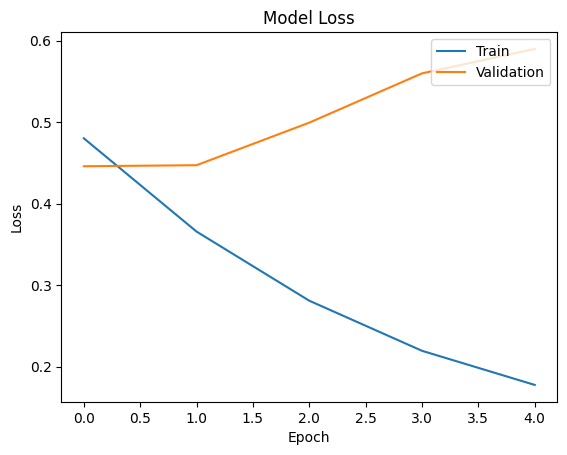

In [29]:
plt.plot(historyRNN.history['loss'])
plt.plot(historyRNN.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

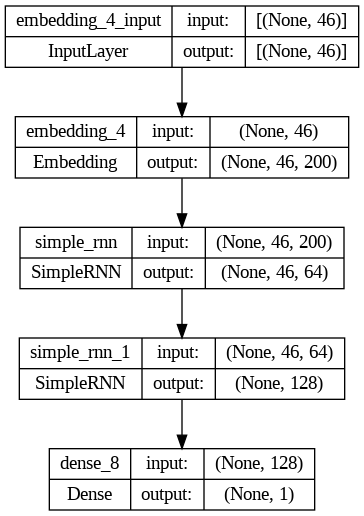

In [30]:
plot_model(modelRNN, to_file='rnn_model.png', show_shapes=True, show_layer_names=True, expand_nested=True)

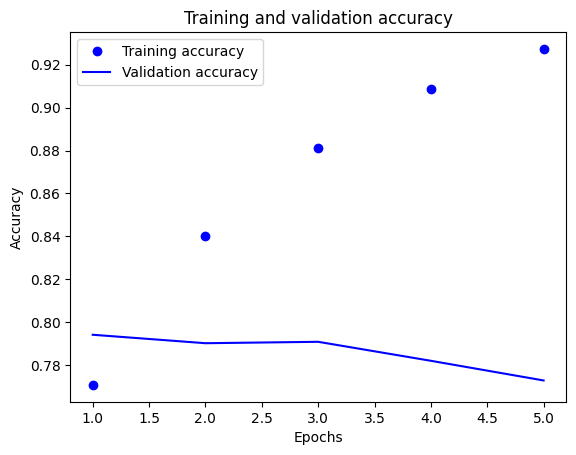

In [31]:
accuracy = historyRNN.history['acc']
val_accuracy = historyRNN.history['val_acc']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

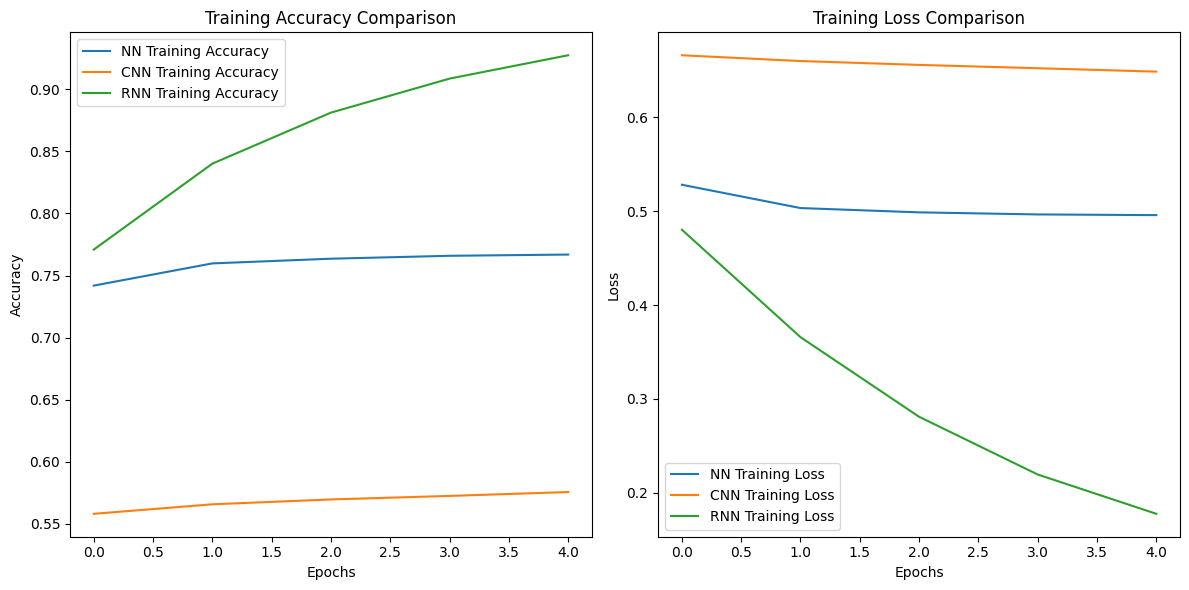

In [33]:
# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='NN Training Accuracy')
plt.plot(historyCNN.history['acc'], label='CNN Training Accuracy')
plt.plot(historyRNN.history['acc'], label='RNN Training Accuracy')
plt.title('Training Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='NN Training Loss')
plt.plot(historyCNN.history['loss'], label='CNN Training Loss')
plt.plot(historyRNN.history['loss'], label='RNN Training Loss')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [35]:
# Save models
import pickle
from tensorflow.keras.models import save_model, load_model
model.save('nn_model.h5')
modelCNN.save('cnn_model.h5')
modelRNN.save('rnn_model.h5')
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
with open('historyCNN.pkl', 'wb') as file:
    pickle.dump(historyCNN.history, file)
with open('historyRNN.pkl', 'wb') as file:
    pickle.dump(historyRNN.history, file)